In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
dados = pd.read_csv('https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv')

In [20]:
dados

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [21]:
# Verificar se usuários que viram determinado anúncio em mídias sociais compreram ou não o produto

##  Aplicar LabelEnconder na coluna Gender

In [22]:
colunas = dados.dtypes.reset_index()
colunas

,index,0
0,User ID,int64
1,Gender,object
2,Age,int64
3,EstimatedSalary,int64
4,Purchased,int64


In [23]:
categ_cols = colunas[colunas[0] == 'object']['index'].to_list()
categ_cols

['Gender']

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in categ_cols:
    le.fit(dados[i])
    dados[str(i)+'_encoded'] = le.transform(dados[i])

In [25]:
dados = dados.drop('Gender', axis=1)
dados.head(3)

,User ID,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0


## Quebrando a base em treino e teste

In [26]:
x = dados.drop('Purchased', axis=1)
y = dados['Purchased']

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42) 

## Carregando o modelo

In [31]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [32]:
# Treinamento
model.fit(x_train, y_train)

GaussianNB()

In [33]:
# Previsão
y_pred = model.predict(x_test)
print(y_pred)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0
 0 1 1 1 0 0 0 0 0]


## Avaliando o resultado

In [34]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.8833333333333333


## Conclusão

O modelo de 88% de acurácia.
Para uma avaliação mais detalhada realizamos a matriz de confusão

## Matriz de Confusão

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[73,  0],
       [14, 33]], dtype=int64)

In [37]:
import seaborn as sns

Text(33.0, 0.5, 'y_pred')

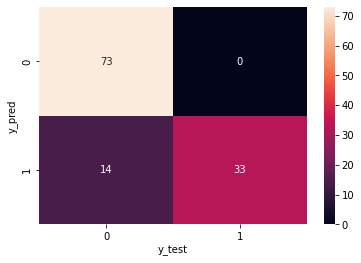

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

plt.xlabel('y_test')
plt.ylabel('y_pred')

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

1.0
0.7021276595744681
0.825
